In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

df = pd.read_csv("parkinsons.data")

In [219]:
X = df.drop(columns=["name", "status"])
y = df["status"]

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [221]:
X_train.shape

(156, 22)

In [222]:
X_test.shape

(39, 22)

In [223]:
y_train

172    0
84     1
135    1
42     0
143    1
      ..
179    1
111    1
130    1
33     0
131    1
Name: status, Length: 156, dtype: int64

In [224]:
y_test

185    0
77     1
76     1
113    1
62     0
85     1
129    1
178    1
43     0
13     1
1      1
112    1
115    1
104    1
107    1
97     1
164    1
17     1
67     1
50     0
46     0
3      1
40     1
194    0
134    1
189    0
8      1
39     1
155    1
127    1
116    1
60     0
83     1
7      1
169    0
153    1
86     1
73     1
64     0
Name: status, dtype: int64

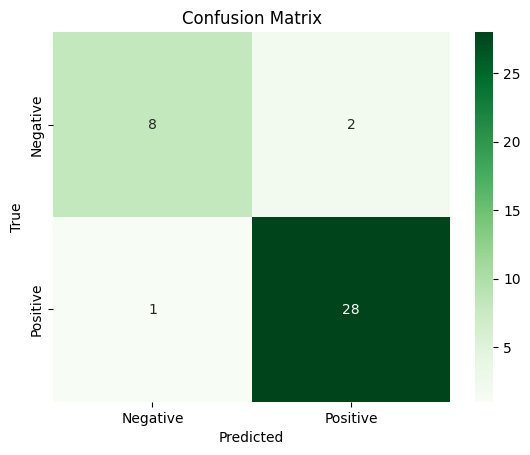

In [225]:
rand_for_model = RandomForestClassifier(random_state=42)
rand_for_model.fit(X_train_scaled, y_train)
y_pred = rand_for_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
labels = ["Negative", "Positive"]

sns.heatmap(cm, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [226]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 8  2]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Accuracy: 0.9230769230769231


[[-0.13276561 -0.32643434 -0.15476255 -0.39794213 -0.56691053  0.40065949
  -0.15771688  0.39923543  0.29231567  0.31729661 -0.17543611  0.25580346
   0.88594467 -0.17518672 -0.15462713  0.2563949  -0.23404749 -0.03842293
   1.09757517  0.33890537  0.65115734  0.80331265]]


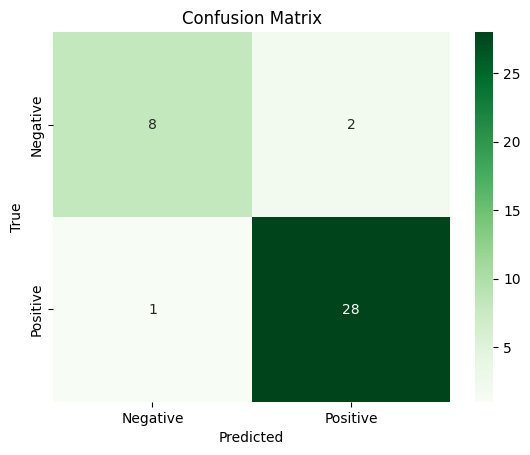

In [ ]:
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_prediction = lr_model.predict(X_test_scaled)
cm_lr = confusion_matrix(y_test, lr_prediction)
label = ["Negative", "Positive"]

sns.heatmap(cm_lr, annot=True, fmt="d", xticklabels=label, yticklabels=label, cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [250]:
lr_features = pd.Series(lr_model.coef_[0], index=X_train.columns).sort_values(ascending=False)
lr_features


spread1             1.097575
MDVP:APQ            0.885945
PPE                 0.803313
D2                  0.651157
MDVP:RAP            0.400659
Jitter:DDP          0.399235
spread2             0.338905
MDVP:Shimmer(dB)    0.317297
MDVP:Shimmer        0.292316
HNR                 0.256395
Shimmer:APQ5        0.255803
DFA                -0.038423
MDVP:Fo(Hz)        -0.132766
NHR                -0.154627
MDVP:Flo(Hz)       -0.154763
MDVP:PPQ           -0.157717
Shimmer:DDA        -0.175187
Shimmer:APQ3       -0.175436
RPDE               -0.234047
MDVP:Fhi(Hz)       -0.326434
MDVP:Jitter(%)     -0.397942
MDVP:Jitter(Abs)   -0.566911
dtype: float64

In [228]:
# Metrics
print(confusion_matrix(y_test, lr_prediction))
print(classification_report(y_test, lr_prediction))
print("Accuracy:", accuracy_score(y_test, lr_prediction))

[[ 8  2]
 [ 1 28]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Accuracy: 0.9230769230769231


In [232]:
feature_importances = pd.Series(rand_for_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances

PPE                 0.152476
spread1             0.106974
MDVP:Fo(Hz)         0.064174
NHR                 0.062347
Jitter:DDP          0.056404
MDVP:Fhi(Hz)        0.055774
MDVP:Flo(Hz)        0.053636
spread2             0.040810
Shimmer:APQ5        0.039663
MDVP:RAP            0.039385
D2                  0.032455
MDVP:APQ            0.031318
MDVP:Shimmer        0.030897
Shimmer:DDA         0.030771
Shimmer:APQ3        0.030374
RPDE                0.029366
MDVP:PPQ            0.029000
MDVP:Jitter(Abs)    0.026482
HNR                 0.024177
MDVP:Jitter(%)      0.021814
MDVP:Shimmer(dB)    0.021326
DFA                 0.020375
dtype: float64

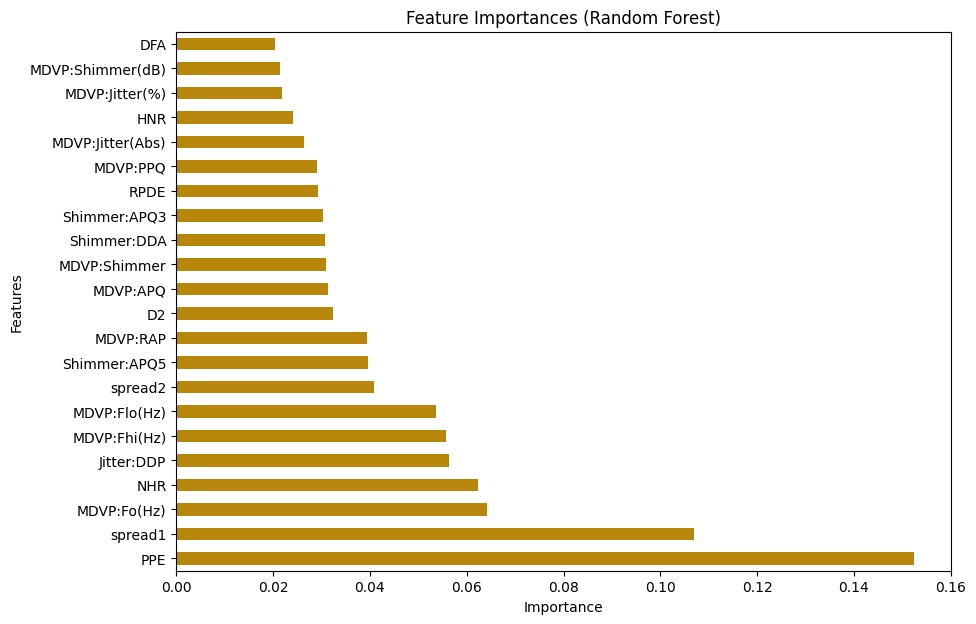

In [236]:
plt.figure(figsize=(10, 7))
feature_importances.plot(kind='barh', color='darkgoldenrod')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()